In [85]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
# from sklearn.metrics import confusion_matrix , classification_report
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
tf.random.set_seed(1234)
import os
import random
from keras.layers import LeakyReLU

In [86]:
import seaborn as sns


In [87]:
os.environ['PYTHONHASHSEED']=str(1234)
tf.random.set_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [88]:
df=pd.read_excel("data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566,4.3,NaN,NaN,NaN,NaN,NaN
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566,10.0,NaN,NaN,NaN,NaN,NaN
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566,17.5,NaN,NaN,NaN,NaN,NaN
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566,31.0,NaN,NaN,NaN,NaN,NaN
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566,34.0,NaN,NaN,NaN,NaN,NaN


In [89]:
data= df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]


In [90]:
data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566,4.3
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566,10.0
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566,17.5
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566,31.0
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566,34.0


In [91]:
X= data[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']]


In [92]:
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566


In [93]:
Y= data['X11']


In [94]:
Y.head()

0     4.3
1    10.0
2    17.5
3    31.0
4    34.0
Name: X11, dtype: float64

In [95]:
#We check the number of unique values in each column
a=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']
for i in a:
    print(len(X[i].unique()))

18
17
17
8
18
17
9
14
55
52


In [96]:
# # plot the boxplot for each variable
# # subplots(): plot subplots
# # figsize(): set the figure size
# fig, ax = plt.subplots(2, 5, figsize=(15, 8))

# # plot the boxplot using boxplot() from seaborn
# # z: let the variable z define the boxplot
# # x: data for which the boxplot is to be plotted
# # orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# # whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# # ax: specifies the axes object to draw the plot o
# # set_xlabel(): set the x-axis label
# # fontsize: sets the font size of the x-axis label
# for variable, subplot in zip(X.columns, ax.flatten()):
#     z = sns.boxplot(x = X[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
#     z.set_xlabel(variable, fontsize = 20)  


In [97]:
# #this code reduces the  above outliers seen. This is done by chaning the values in the box plot based on inter quantile range 
# for i in X.columns:
#     q1=X[i].quantile(0.25)
#     q3=X[i].quantile(0.75)
#     iqr=q3-q1
#     ub=q3 + 1.5*iqr
#     lb=q1 - 1.5*iqr
#     uc=X[i].quantile(0.99)
#     lc=X[i].quantile(0.01)
#     for ind1 in X[i].index:
#         if X.loc[ind1, i] >ub:            
#             X.loc[ind1, i] =uc
#         if X.loc[ind1, i] < lb:
#             X.loc[ind1, i] =lc


In [98]:
# # plot the boxplot for each variable
# # subplots(): plot subplots
# # figsize(): set the figure size
# fig, ax = plt.subplots(2, 5, figsize=(15, 8))

# # plot the boxplot using boxplot() from seaborn
# # z: let the variable z define the boxplot
# # x: data for which the boxplot is to be plotted
# # orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# # whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# # ax: specifies the axes object to draw the plot o
# # set_xlabel(): set the x-axis label
# # fontsize: sets the font size of the x-axis label
# for variable, subplot in zip(X.columns, ax.flatten()):
#     z = sns.boxplot(x = X[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
#     z.set_xlabel(variable, fontsize = 20)  


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [100]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [103]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score


In [104]:
kf =KFold(n_splits=10, shuffle=True, random_state=42)

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)
from sklearn.model_selection import cross_val_score
RF_accuracies = cross_val_score(estimator = rf, X = X, y = Y, cv = kf,scoring="r2")
print("Mean_RF_Acc : ", RF_accuracies.mean())


Mean_RF_Acc :  0.8073577453485754


# So i just tried a neural network below, it is similar to the neural network given in the machine learning mastery, not really sure what it means but have to work on that

In [107]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
# from tf.keras.optimizers import SGD

In [108]:
# opt = SGD(lr=0.01, momentum=0.9)
from sklearn.metrics import r2_score

Train: 46.376, Test: 63.081


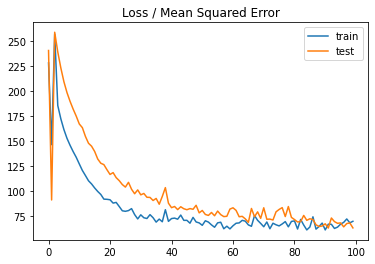

In [120]:
# DO NOT Modify
reg_model = Sequential()
reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_initializer='he_uniform'))
reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dropout(0.2))

reg_model.add(Dense(1, activation='linear'))
reg_model.compile(loss='mse', 
                optimizer='SGD')


history = reg_model.fit(X_train_std, Y_train, 
                            validation_data=(X_test_std, Y_test), 
                            epochs=100, verbose=0)

train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [ ]:
print("R2 score : %.2f" % r2_score(Y_test,y_preds)**0.5)

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

# Principal Component Analysis

In [ ]:
#principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca.shape

In [ ]:
PCA_df = pd.DataFrame(data = X_pca)
PCA_df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(PCA_df, Y, test_size=0.20, random_state=101)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [58]:
# DO NOT Modify
reg_model = Sequential()
reg_model.add(Dense(8, input_dim=8, activation='relu',kernel_initializer='he_uniform'))
reg_model.add(Dense(4, activation='relu'))
# reg_model.add(Dropout(0.2))

reg_model.add(Dense(1, activation='linear'))
reg_model.compile(loss='mae', 
                optimizer='adam', 
                metrics=['mae'])


his = reg_model.fit(X_train, Y_train, 
                            validation_data=(X_test, Y_test), 
                            epochs=100, verbose=0)

print(reg_model.evaluate(X_test, Y_test))

y_preds = reg_model.predict(X_test)

2/2 [==============================] - 0s 8ms/step - loss: 8.9863 - mae: 8.9863
[8.98630428314209, 8.98630428314209]


# AutoEncoder

In [21]:
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape=(X.shape[1],))
encoded = Dense(8, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='softmax')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                shuffle=True,
                verbose = 30,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae = encoder.predict(X)


Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [22]:
X_ae.shape

(219, 8)

In [93]:
from keras import regularizers
batch_size = 32
input_dim = X_train[0].shape[0] #num of predictor variables 
learning_rate = 1e-4
input_layer = Input(shape=(input_dim, ), name="input")
#Input Layer
encoder = Dense (100, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
#Encoder’s first dense layer
encoder = Dense (50, activation="relu",
activity_regularizer=regularizers.l1(learning_rate))(encoder)
#Encoder’s second dense layer
encoder = Dense (25, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Code layer
encoder = Dense (8, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Decoder’s first dense layer
decoder = Dense(25, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Decoder’s second dense layer
decoder = Dense(50, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(decoder)
# Decoder’s Third dense layer
decoder = Dense(100, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(decoder)
# Output Layer
decoder = Dense(input_dim, activation="sigmoid", activity_regularizer=regularizers.l1(learning_rate))(decoder)

In [94]:
autoencoder_1 = Model(inputs=input_layer, outputs=decoder)
autoencoder_1.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')
satck_1 = autoencoder_1.fit(X_train, X_train,epochs=200,batch_size=batch_size)


Epoch 1/200
6/6 [==============================] - 1s 1ms/step - loss: 0.1504 - accuracy: 0.1429
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 0.1455 - accuracy: 0.1371
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.1371
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.1239 - accuracy: 0.1371
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.1371
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.1371
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.1371
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0854 - accuracy: 0.1371
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.1371
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.1543
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 0.8000
Epoch 167/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.8000
Epoch 168/200
6/6 [==============================] - 0s 219us/step - loss: 0.0056 - accuracy: 0.7943
Epoch 169/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 0.7943
Epoch 170/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.8000
Epoch 171/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.8000
Epoch 172/200
6/6 [==============================] - 0s 995us/step - loss: 0.0055 - accuracy: 0.7943
Epoch 173/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.8000
Epoch 174/200
6/6 [==============================] - 0s 416us/step - loss: 0.0054 - accuracy: 0.7943
Epoch 175/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 0.7943
Epoch 176/200
6/6 

In [95]:
autoencoder_2_input = autoencoder_1.predict(X_train)
autoencoder_2_input = np.concatenate((autoencoder_2_input , X_train))


In [96]:
autoencoder_2 = Model(inputs=input_layer, outputs=decoder)
autoencoder_2.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')
satck_2 = autoencoder_2.fit(autoencoder_2_input, autoencoder_2_input,epochs=100,batch_size=batch_size)


Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 0.0045 - accuracy: 0.9029
Epoch 2/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 0.8943
Epoch 3/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.8857
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.8943
Epoch 5/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 0.8914
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.8829
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.8857
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.8857
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.8829
Epoch 10/100
11/11 [==============================] - 0s 858us/step - loss: 0.0038 - accuracy: 0.8800
Epoch 1

In [97]:
autoencoder_3_input = autoencoder_2.predict(autoencoder_2_input)
autoencoder_3_input = np.concatenate((autoencoder_3_input, autoencoder_2_input))


In [98]:
autoencoder_3 = Model(inputs=input_layer, outputs=decoder)
autoencoder_3.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')
satck_3 = autoencoder_3.fit(autoencoder_3_input, autoencoder_3_input, epochs=50, batch_size=16)

Epoch 1/50
44/44 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 0.9171
Epoch 2/50
44/44 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.9271
Epoch 3/50
44/44 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.9257
Epoch 4/50
44/44 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.9114
Epoch 5/50
44/44 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.9157
Epoch 6/50
44/44 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.9157
Epoch 7/50
44/44 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.9143
Epoch 8/50
44/44 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.9257
Epoch 9/50
44/44 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.9200
Epoch 10/50
44/44 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.9271
Epoch 11/50
44/44 [

In [99]:
encoded = Model(input_layer, encoder)
X_ae1 = encoded.predict(X)
X_ae1.shape

(219, 8)

In [100]:
AEC_df = pd.DataFrame(data = X_ae1)
AEC_df.head()

,0,1,2,3,4,5,6,7
0,0.068433,0.081002,0.0,0.101947,0.021714,0.0,0.002771,0.0
1,0.068422,0.080959,0.0,0.101932,0.021790,0.0,0.002816,0.0
2,0.068404,0.080887,0.0,0.101907,0.021917,0.0,0.002891,0.0
3,0.068332,0.080600,0.0,0.101809,0.022426,0.0,0.003191,0.0
4,0.068188,0.080025,0.0,0.101613,0.023443,0.0,0.003792,0.0


# Independent component analysis

In [29]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=8)
X_ica = ica.fit_transform(X)
X_ica = pd.DataFrame(data = X_ica)


In [30]:
X_ica.head()

,0,1,2,3,4,5,6,7
0,-0.016637,-0.032390,-0.120925,-0.073528,0.032233,0.031620,0.035413,0.015851
1,-0.016648,-0.032399,-0.120950,-0.073510,0.032222,0.031528,0.035400,0.015844
2,-0.016666,-0.032414,-0.120992,-0.073480,0.032203,0.031374,0.035378,0.015832
3,-0.016739,-0.032473,-0.121160,-0.073360,0.032129,0.030761,0.035292,0.015786
4,-0.016885,-0.032591,-0.121495,-0.073121,0.031981,0.029534,0.035118,0.015693
